# Question 2

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import math
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from scipy.io import loadmat
data = loadmat('/content/drive/My Drive/dataset_2.mat')

In [ ]:
samples = data['samples']
labels = data['labels']
labels = labels[0]

In [ ]:
print(samples)

[[-3.74203958 -3.04465737]
 [ 4.60871196  7.01765941]
 [ 5.31135551  0.97011991]
 ...
 [ 5.17666258  5.10746383]
 [ 6.66563706  5.465137  ]
 [ 7.86690019  4.4964122 ]]


In [ ]:
print(labels[:100])

[0 3 2 3 0 3 3 1 3 0 3 3 1 2 1 3 0 0 3 2 3 1 1 2 1 1 1 1 2 2 3 0 0 3 2 2 3
 0 2 1 3 2 0 1 2 0 2 0 0 1 0 1 2 2 2 3 3 3 0 1 2 3 1 1 0 2 0 0 3 1 3 0 0 0
 0 0 0 2 0 1 0 1 1 1 0 3 3 0 2 0 0 2 3 3 2 1 0 2 0 2]


In [ ]:
def splitting(X,y,test_size):
  size = y.size
  train_size = int (size*(1-test_size))
  # test_size = size[0]-train_size
  X_train = X[:train_size,:]
  X_test = X[train_size:,:]
  y_train = y[:train_size]
  y_test = y[train_size:]

  return X_train, X_test, y_train, y_test;

In [ ]:
X_train, X_test, y_train, y_test = splitting(samples,labels,0.3)

In [ ]:
print(X_train.shape,X_test.shape)

(14000, 2) (6000, 2)


In [ ]:
def checking_accuracy(y_test,y_pred):
  n=0
  j=0
    
  while (j<y_test.size): #test_accuracy
    if (y_pred[j] == y_test[j]):
      n+=1
    j+=1
  accu = n/j
  return accu

# Question 2.a)

In [ ]:
def getting_accuracies(ac): 
  i=1
  accuracy = 0
  best_depth=0
  while(i<=15):
    clf = DTC(criterion = 'entropy', random_state = 0, max_depth=i)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    accu = checking_accuracy(y_test,y_pred)
    
    print(accu)
    if(accu > accuracy):
      accuracy = accu
      best_depth=i
    ac[i-1] = accu
    i+=1
  return (ac)

In [ ]:
depth = [i for i in range(1,16)]
ac = [0]*15
ac = getting_accuracies(ac)

0.49666666666666665
0.966
0.966
0.9658333333333333
0.9651666666666666
0.9648333333333333
0.9635
0.9623333333333334
0.9605
0.9598333333333333
0.9608333333333333
0.9586666666666667
0.9571666666666667
0.9575
0.9558333333333333


In [ ]:
depth = np.array(depth)
ac = np.array(ac)
print(depth.shape, ac.shape)

(15,) (15,)


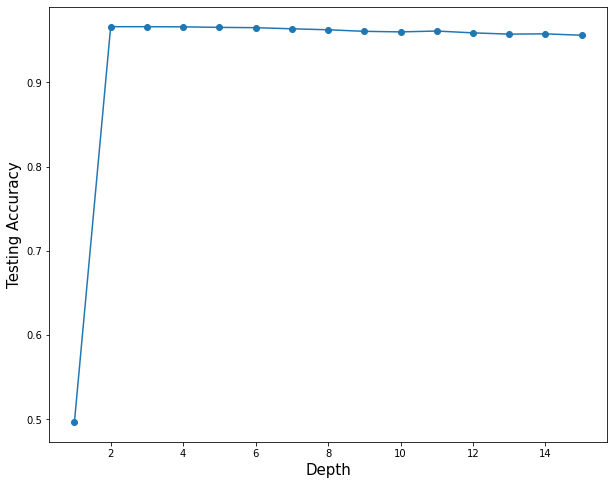

In [ ]:
plt.figure(figsize=[10,8])
plt.xlabel('Depth',fontsize=15)
plt.ylabel('Testing Accuracy',fontsize=15)
plt.plot(depth,ac,marker='o')
plt.show()

# Question 2.b)

In [ ]:
train_ac = [0]*15
test_ac = [0]*15

depth = [i for i in range(1,16)]

def training_test_accuracies():
  i=1
  while(i<=15):
    clf = DTC(criterion = 'entropy', random_state = 0, max_depth=i)
    clf.fit(X_train,y_train)
    
    y_pred = clf.predict(X_test)
    accu = checking_accuracy(y_test,y_pred)
    test_ac[i-1] = accu

    y_pred = clf.predict(X_train)
    accu = checking_accuracy(y_train,y_pred)
    train_ac[i-1] = accu
    i+=1

training_test_accuracies()

In [ ]:
train_ac = np.array(train_ac)
test_ac = np.array(test_ac)
depth = np.array(depth)

# s = np.concatenate((depth.reshape(len(depth),1),train_ac.reshape(len(train_ac),1),test_ac.reshape(len(test_ac),1)),1)
# print(s.shape)

In [ ]:
dic = {'Depth':depth,'Training Data Accuracy':train_ac,'Testing Data Accuracy':test_ac}
df = pd.DataFrame(data=dic)
df

,Depth,Training Data Accuracy,Testing Data Accuracy
0,1,0.501429,0.496667
1,2,0.966357,0.966000
2,3,0.966357,0.966000
3,4,0.966429,0.965833
4,5,0.966643,0.965167
5,6,0.967214,0.964833
6,7,0.968571,0.963500
7,8,0.969643,0.962333
8,9,0.971500,0.960500
9,10,0.973286,0.959833


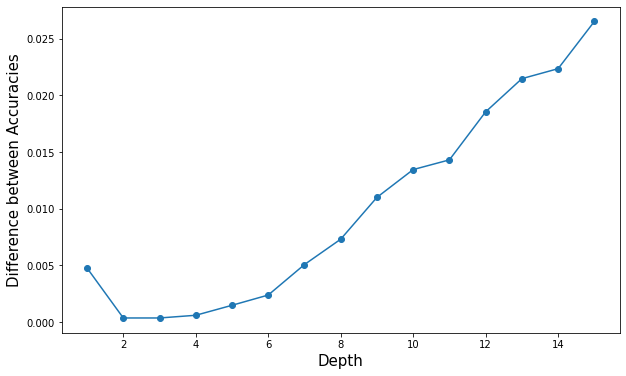

In [ ]:
diff = train_ac-test_ac
# print(diff)
plt.figure(figsize=[10,6])
plt.xlabel('Depth',fontsize=15)
plt.ylabel('Difference between Accuracies',fontsize=15)
plt.plot(depth,diff,marker='o')
plt.show()

# Question 2.c)

In [ ]:
depth = [i for i in range(1,16)]

def accuracy_builtIn(ac_inbuilt):
  i=1
  while(i<=15):
    clf = DTC(criterion = 'entropy', random_state = 0, max_depth=i)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    accu = accuracy_score(y_test, y_pred)
    ac_inbuilt[i-1] = accu
    i+=1
  return (ac_inbuilt)

In [ ]:
ac_inbuilt = [0]*15 
ac_inbuilt = accuracy_builtIn(ac_inbuilt)

In [ ]:
ac_inbuilt = np.array(ac_inbuilt)
result = np.concatenate((ac.reshape(len(ac),1), ac_inbuilt.reshape(len(ac_inbuilt),1)),1)
colm = ['Accuracy By Code','Accuracy By Inbuilt Function']
df = pd.DataFrame(result,columns=colm)
df

,Accuracy By Code,Accuracy By Inbuilt Function
0,0.496667,0.496667
1,0.966000,0.966000
2,0.966000,0.966000
3,0.965833,0.965833
4,0.965167,0.965167
5,0.964833,0.964833
6,0.963500,0.963500
7,0.962333,0.962333
8,0.960500,0.960500
9,0.959833,0.959833


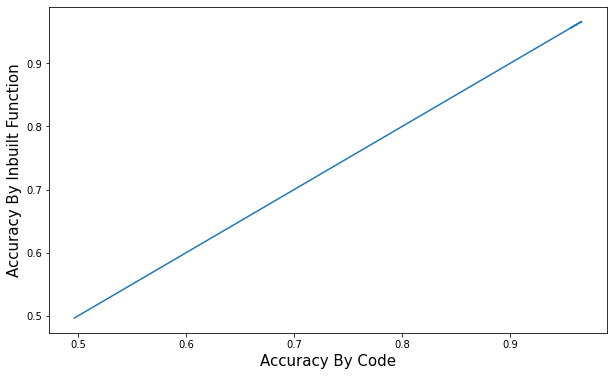

In [ ]:
plt.figure(figsize=[10,6])
plt.xlabel('Accuracy By Code',fontsize=15)
plt.ylabel('Accuracy By Inbuilt Function',fontsize=15)
plt.plot(ac,ac_inbuilt)
plt.show()